<H1> Improving Model by Adding Batch Normalization </H1>

Batch normalization works similarly to normalizing input data by dividing x_train by 255. This process scales all features equally, helping the model converge more easily and reducing distortions. 

Batch normalization does just that. When we pass the CNN through a batch normalization layer, we normalize the weights, stabilizing the model and allowing for longer training and larger learning rates. This method computes the mean and variance for each mini-batch, not the entire dataset.

Adding batch normalization can stabilize and potentially speed up the learning process.

<H1> Loading Libraries </H1>

In [1]:
# keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# visuals
import matplotlib.pyplot as plt

<H1>Data Preparation:</H1>

The Cifar10 dataset is loaded and split into training and testing sets.
The images are reshaped to include three channels (color) and normalized to the range [0, 1].
Labels are one-hot encoded to match the output layer of the network.

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

<H1> Adding Batch Normalization: </H1>

Let's regularize the model using BN, a very effective regularization technique in deep learning.

In [3]:
# declare some important variables
BATCH_SIZE = 64
EPOCHS = 50

In [4]:
# Define the CNN model
simple_model = models.Sequential()

# 3 block vgg style model 
# Base of the model

# block 1
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape = (32,32,3)))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.MaxPooling2D((2, 2)))

# block 2
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.MaxPooling2D((2, 2)))

# block 3
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.MaxPooling2D((2, 2)))

# head of the model
simple_model.add(layers.Flatten())
simple_model.add(layers.Dense(128, activation='relu'))
simple_model.add(layers.BatchNormalization()) # Add BN
simple_model.add(layers.Dense(10, activation='softmax'))

In [5]:
simple_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

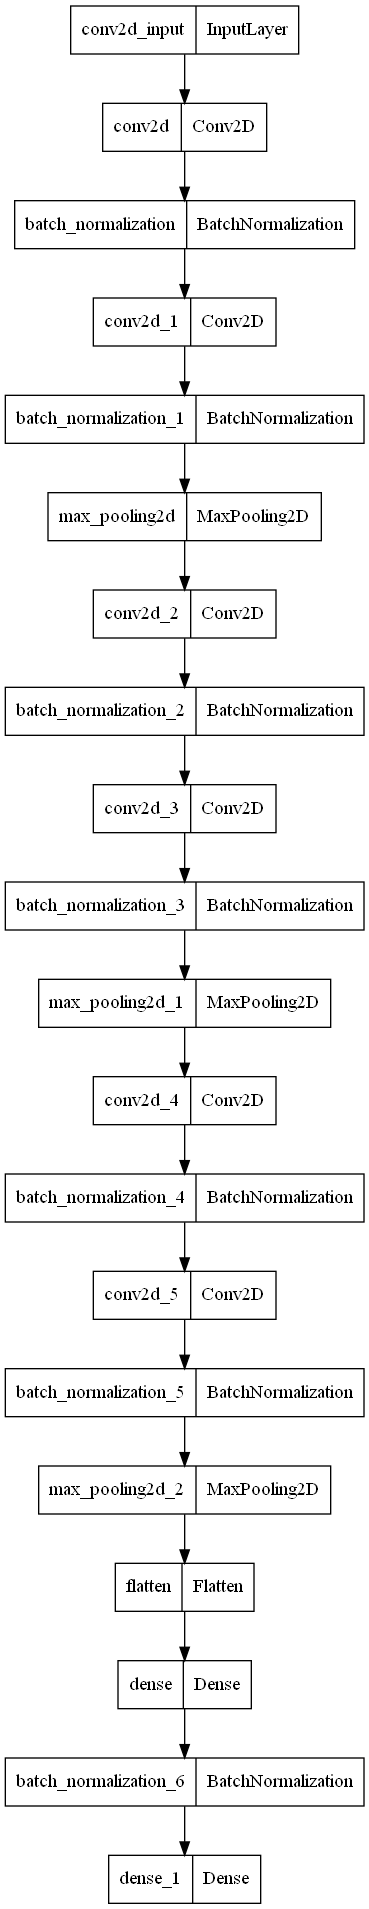

In [6]:
plot_model(simple_model)

<H1> Model Training: </H1>

The model is compiled with the Adam optimizer and categorical cross-entropy loss function.
The fit function trains the model using the training data and evaluates it on the test data for EPOCHS epochs with a batch size of BATCH_SIZE

In [7]:
# Compile the model
simple_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_train = simple_model.fit(X_train, y_train, 
                            validation_data=(X_train, y_train), 
                            epochs=EPOCHS, 
                            batch_size=BATCH_SIZE
                            )


Epoch 1/50
782/782 [==============================] - 12s 11ms/step - loss: 1.1888 - accuracy: 0.5797 - val_loss: 0.9376 - val_accuracy: 0.6671
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 0.7555 - accuracy: 0.7341 - val_loss: 0.7546 - val_accuracy: 0.7393
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 0.5988 - accuracy: 0.7918 - val_loss: 0.5464 - val_accuracy: 0.8092
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 0.4899 - accuracy: 0.8296 - val_loss: 0.4013 - val_accuracy: 0.8611
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 0.4016 - accuracy: 0.8601 - val_loss: 0.4495 - val_accuracy: 0.8398
Epoch 6/50
782/782 [==============================] - 6s 8ms/step - loss: 0.3272 - accuracy: 0.8865 - val_loss: 0.3483 - val_accuracy: 0.8777
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.2648 - accuracy: 0.9071 - val_loss: 0.2405 - val_accuracy: 0.9153
Epoc

In [8]:
def myplot( hist ):
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title("Accuracy by VGG3 on CIFAR-10 Data")
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Loss by VGG3 on CIFAR-10 Data')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'])
    plt.show()

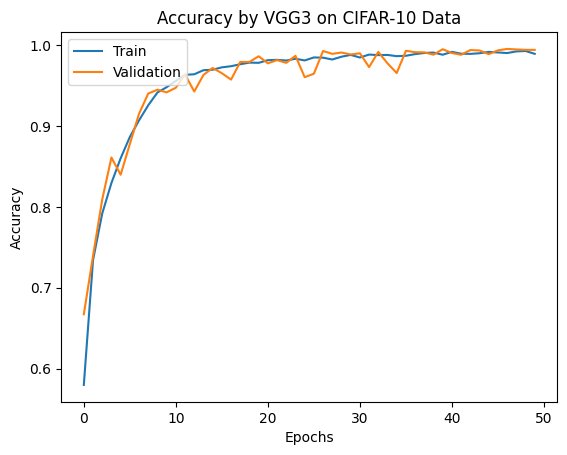

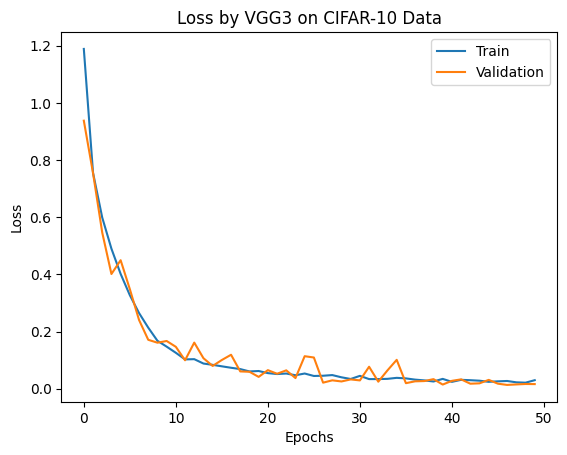

In [9]:
myplot(hist_train)

In [10]:
simple_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1216 - accuracy: 0.8136


[1.1216009855270386, 0.8136000037193298]